# Bandit Problem

In [61]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 
import matplotlib.pyplot as plt
import numpy as np

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [64]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [67]:
bandits[0].pullLever()

-1.5193985902654727

## Greedy algorithm Implementation

In [70]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    
    N = np.zeros(10)
    Q = np.zeros(10)
    
    rewards = []
    
    for _ in range(1000):
        idx = np.argmax(Q)
        reward = bandits[idx].pullLever()
        rewards.append(reward)
        N[idx] += 1
        Q[idx] += (reward - Q[idx])/N[idx]
    
    return rewards

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

[]

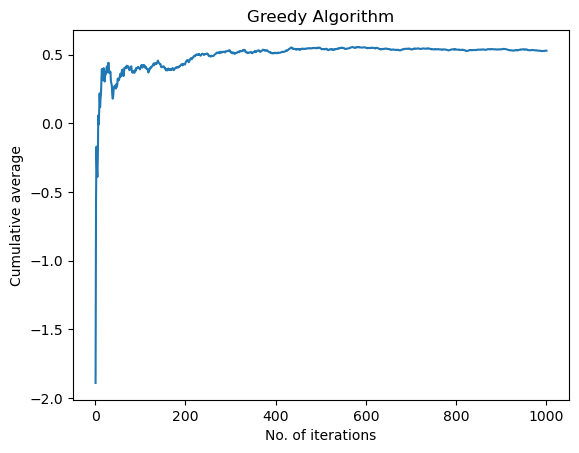

In [73]:
rewards = run_greedy()
x = np.arange(1, 1001)
cumsum = np.cumsum(rewards)
y = cumsum / x
plt.plot(x, y)
plt.xlabel("No. of iterations")
plt.ylabel("Cumulative average")
plt.title("Greedy Algorithm")
plt.plot()

## $\epsilon$-greedy Algorithm

In [76]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    
    N = np.zeros(10)
    Q = np.zeros(10)
    rewards = []
    
    for _ in range(1000):
        if random.random() > epsilon:
            idx = np.argmax(Q)
        else:
            idx = random.randint(0, 9)
            
        reward = bandits[idx].pullLever()
        rewards.append(reward)
        
        N[idx] += 1
        Q[idx] += (reward-Q[idx])/N[idx]
        
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

[]

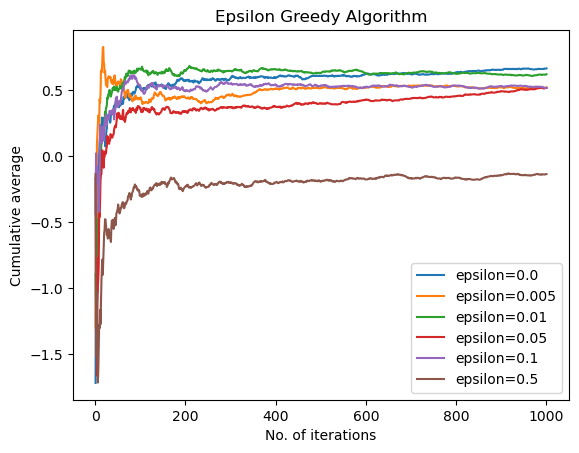

In [79]:
x = np.arange(1,1001)
epsilons = [0.0, 0.005, 0.01, 0.05, 0.1, 0.5]
for epsilon in epsilons:
    rewards = run_epsilon_greedy(epsilon)
    cumulative_sum = np.cumsum(rewards)
    y=cumulative_sum/x
    plt.plot(x, y, label =f"epsilon={epsilon}")
plt.xlabel("No. of iterations")
plt.ylabel("Cumulative average")
plt.title("Epsilon Greedy Algorithm")
plt.legend()
plt.plot()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

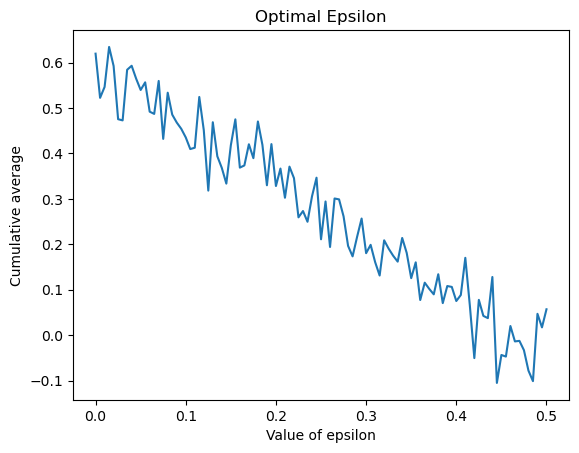

Optimal Epsilon is:  0.015


In [83]:
epsilons = np.linspace(0,0.5,101)
y = []

for epsilon in epsilons:
    rewards=run_epsilon_greedy(epsilon)
    y.append(np.mean(rewards))
    
plt.plot(epsilons,y)
plt.xlabel("Value of epsilon")
plt.ylabel("Cumulative average")
plt.title("Optimal Epsilon")
plt.show()
print("Optimal Epsilon is: ", epsilons[np.argmax(y)])

## Optimistic Initial Values

In [86]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
    N = np.zeros(10)
    Q = np.ones(10) * 10
    rewards=[]
    
    for _ in range(1000):
        idx = np.argmax(Q)
        reward = bandits[idx].pullLever()
        rewards.append(reward)
        
        N[idx] += 1
        Q[idx] += (reward-Q[idx]) / N[idx]
    
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

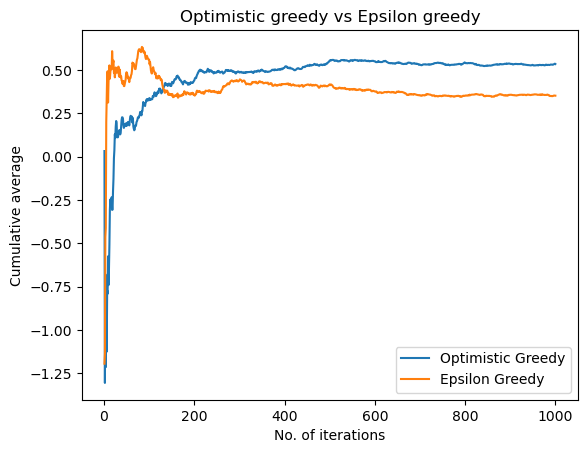

In [89]:
x = np.arange(1, 1001)
rewards = run_optimistic_greedy()
cumsum = np.cumsum(rewards)
y = cumsum / x

rewards2 = run_epsilon_greedy(0.1)
cumsum2 = np.cumsum(rewards2)
y2 = cumsum2 / x

plt.plot(x, y, label="Optimistic Greedy")
plt.plot(x, y2, label="Epsilon Greedy")

plt.xlabel("No. of iterations")
plt.ylabel("Cumulative average")
plt.title("Optimistic greedy vs Epsilon greedy")
plt.legend()
plt.show()

## Upper Confidence Bound (UCB)

In [92]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    N = np.zeros(10)
    Q = np.zeros(10)
    rewards = []
    
    for t in range(1,1001):
        ucb = np.zeros(10)
        
        for i in range(10):
            if N[i] == 0:
                ucb[i] = float('inf')
            else:
                ucb[i] = Q[i] + c * np.sqrt(np.log(t) / N[i])
        
        idx = np.argmax(ucb)
        reward = bandits[idx].pullLever()
        rewards.append(reward)
        N[idx] += 1
        Q[idx] += (reward-Q[idx])/N[idx]
    return rewards

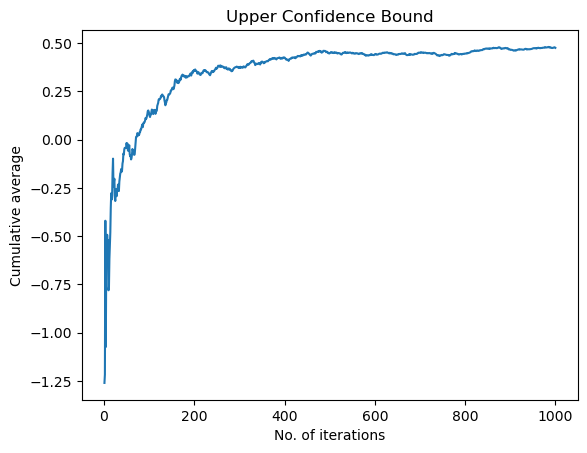

In [93]:
rewards = run_ucb(2)

x = np.arange(1, 1001)
cumsum = np.cumsum(rewards)
y = cumsum / x

plt.plot(x, y)
plt.xlabel("No. of iterations")
plt.ylabel("Cumulative average")
plt.title("Upper Confidence Bound")
plt.show()